# Classifing a image as cat or dog

In [258]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [269]:
X = np.loadtxt("input.csv", delimiter=',')
Y = np.loadtxt("labels.csv",delimiter= ',')


# https://drive.google.com/drive/u/0/folders/1dZvL1gi5QLwOGrfdn9XEsi4EnXx535bD



In [320]:
# A =np.loadtxt('A.csv', delimiter= ',')
X.shape

(2000, 30000)

In [271]:
X_train = X
Y_train = Y

print(X_train.shape,Y_train.shape)


(2000, 30000) (2000,)


In [272]:
# X1 = X[::-1]
# Y1 = Y[::-1]

X_test = X[:100]
Y_test = Y[:100]

print(X_test.shape,Y_test.shape)

(100, 30000) (100,)


In [273]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

## Making in range 0-1

In [274]:
X_train =X_train/255
# Y_train =Y_train/255
X_test =X_test/255
# Y_test =Y_test/255

In [275]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)
# 

(2000, 100, 100, 3) (2000, 1) (100, 100, 100, 3) (100, 1)


[1.]


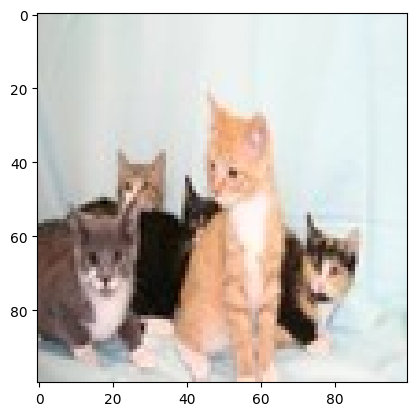

In [277]:
plt.imshow(X_train[1002])
print(Y_train[1002])
plt.show()

# Model

In [95]:
# Sequential is stacking layers

# SEQUENTIAL
# sequential([
# conv2D({filtersNo},{sizeoffilter(3,3)}, activation='relu', input_shape = (100,100,3))
# MaxPool2D((2,2),stride{not reqd})
# conv2D({filtersNo},{sizeoffilter(3,3)}, activation='relu', input_shape not reqd)
# MaxPool2D((2,2))

# Flatten(),
# Dense(64 , activation='relu'),
# dense(1, actvation = 'sigmoid')
# ])


In [278]:

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
    
])

# OR
#  We can also follow this method

# model = Sequential()

# model.add(Conv2D(32,(3,3),activation='relu',input_shape = (100,100,3)))
# model.add(MaxPooling2D((2,2)))
# model.add(Conv2D(32,(3,3),activation='relu'))
# model.add(MaxPooling2D((2,2)))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

C:\Users\Manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Adding cost and back propagation

In [279]:
# model.compile(loss= 'binary_crossentropy',optimizer = 'adam',metrics= ['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training Data

In [280]:
model.fit(X_train,Y_train, epochs = 5 , batch_size =64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - accuracy: 0.5044 - loss: 0.8319
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.5564 - loss: 0.6839
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.6466 - loss: 0.6387
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.7096 - loss: 0.5713
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 174ms/step - accuracy: 0.7966 - loss: 0.4574


In [281]:
model.evaluate(X_test, Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9199 - loss: 0.1980


[0.18964658677577972, 0.9300000071525574]

# Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


array([[0.00048066]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Dog [[0.24267218]]


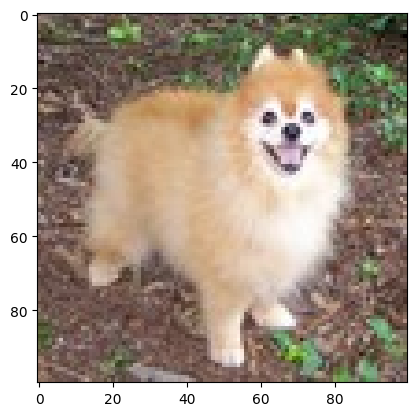

In [301]:
x=99
y_pred = model.predict(X_train[x,:].reshape(1,100,100,3))
if(y_pred >0.3):
    print("Cat",y_pred)
else:
    print("Dog",y_pred)
plt.imshow(X_train[x])
plt.show()


In [317]:
x=np.array([1],ndmin=[100,100,3])
x.shape
x
# plt.imshow(x)

TypeError: 'list' object cannot be interpreted as an integer